## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              82.07
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   5.03e-103
Time:                        16:01:56   Log-Likelihood:                         -306.31
No. Observations:                 404   AIC:                                      638.6
Df Residuals:                     391   BIC:                                      690.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

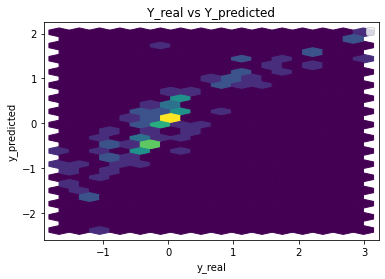

Performance Metrics
Mean Squared Error: 0.23900058278195332
Mean Absolute Error: 0.36633863322294646
Manhattan distance: 37.36654058874054
Euclidean distance: 4.93741424672462


Stats Model MAE 0.36633863322294646


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548
0:	learn: 0.9753160	total: 61ms	remaining: 1m
1:	learn: 0.9540879	total: 63.9ms	remaining: 31.9s
2:	learn: 0.9349576	total: 65.8ms	remaining: 21.9s
3:	learn: 0.9201067	total: 67.7ms	remaining: 16.8s
4:	learn: 0.9017603	total: 69.4ms	remaining: 13.8s
5:	learn: 0.8876481	total: 71.9ms	remaining: 11.9s
6:	learn: 0.8709270	total: 74.7ms	remaining: 10.6s
7:	learn: 0.8537637	total: 77.3ms	remaining: 9.59s
8:	learn: 0.8385641	total: 80.1ms	remaining: 8.82s
9:	learn: 0.8218449	total: 83.1ms	remaining: 8.22s
10:	learn: 0.8082772	total: 85.4ms	remaining: 7.68s
11:	learn: 0.7934005	total: 87.8ms	remaining: 7.23s
12:	learn: 0.7781130	total: 89.6ms	remaining: 6.8s
13:	learn: 0.7633154	total: 91.2ms	remaining: 6.42s
14:	learn: 0.7505343	total: 92.7ms	remaining: 6.08s
15:	learn: 0.7368185	total: 94.1ms	remaining: 5.79s
16:	learn: 0.7256291	total: 95.6ms	remaining: 5.53s
17:	learn: 0.7122400	total: 97.2ms	remaining: 5.3s
18:	learn: 0.7003038	total: 98.7ms	remaining: 5.1s
1

37:	learn: 0.5290816	total: 128ms	remaining: 3.24s
38:	learn: 0.5226610	total: 130ms	remaining: 3.19s
39:	learn: 0.5159285	total: 131ms	remaining: 3.15s
40:	learn: 0.5099424	total: 132ms	remaining: 3.1s
41:	learn: 0.5023425	total: 134ms	remaining: 3.05s
42:	learn: 0.4962343	total: 135ms	remaining: 3.01s
43:	learn: 0.4906689	total: 136ms	remaining: 2.96s
44:	learn: 0.4838023	total: 138ms	remaining: 2.93s
45:	learn: 0.4771189	total: 139ms	remaining: 2.88s


46:	learn: 0.4717942	total: 140ms	remaining: 2.85s
47:	learn: 0.4661926	total: 143ms	remaining: 2.83s
48:	learn: 0.4618642	total: 145ms	remaining: 2.81s
49:	learn: 0.4561687	total: 146ms	remaining: 2.77s
50:	learn: 0.4508413	total: 147ms	remaining: 2.74s
51:	learn: 0.4460939	total: 149ms	remaining: 2.71s
52:	learn: 0.4415839	total: 150ms	remaining: 2.68s
53:	learn: 0.4373957	total: 151ms	remaining: 2.65s
54:	learn: 0.4331461	total: 153ms	remaining: 2.62s
55:	learn: 0.4292343	total: 154ms	remaining: 2.59s
56:	learn: 0.4260481	total: 155ms	remaining: 2.57s
57:	learn: 0.4217669	total: 157ms	remaining: 2.55s
58:	learn: 0.4185445	total: 158ms	remaining: 2.52s
59:	learn: 0.4137961	total: 160ms	remaining: 2.5s
60:	learn: 0.4096956	total: 161ms	remaining: 2.48s
61:	learn: 0.4049549	total: 162ms	remaining: 2.46s
62:	learn: 0.4012941	total: 164ms	remaining: 2.44s
63:	learn: 0.3974568	total: 165ms	remaining: 2.42s
64:	learn: 0.3949750	total: 167ms	remaining: 2.4s
65:	learn: 0.3921361	total: 168ms

72:	learn: 0.3683442	total: 177ms	remaining: 2.25s
73:	learn: 0.3648257	total: 179ms	remaining: 2.24s
74:	learn: 0.3619642	total: 180ms	remaining: 2.22s
75:	learn: 0.3594787	total: 182ms	remaining: 2.21s
76:	learn: 0.3568648	total: 183ms	remaining: 2.19s
77:	learn: 0.3546371	total: 186ms	remaining: 2.19s
78:	learn: 0.3527424	total: 187ms	remaining: 2.19s
79:	learn: 0.3508685	total: 190ms	remaining: 2.18s
80:	learn: 0.3485178	total: 192ms	remaining: 2.18s
81:	learn: 0.3456221	total: 194ms	remaining: 2.17s
82:	learn: 0.3438787	total: 197ms	remaining: 2.17s
83:	learn: 0.3415425	total: 199ms	remaining: 2.17s
84:	learn: 0.3396840	total: 202ms	remaining: 2.17s
85:	learn: 0.3370644	total: 204ms	remaining: 2.17s
86:	learn: 0.3347810	total: 207ms	remaining: 2.17s
87:	learn: 0.3327740	total: 210ms	remaining: 2.17s
88:	learn: 0.3306029	total: 212ms	remaining: 2.17s
89:	learn: 0.3281592	total: 218ms	remaining: 2.21s
90:	learn: 0.3265586	total: 221ms	remaining: 2.21s
91:	learn: 0.3249531	total: 224

116:	learn: 0.2880623	total: 281ms	remaining: 2.12s
117:	learn: 0.2869660	total: 283ms	remaining: 2.11s
118:	learn: 0.2859804	total: 285ms	remaining: 2.11s
119:	learn: 0.2849059	total: 286ms	remaining: 2.1s
120:	learn: 0.2835010	total: 288ms	remaining: 2.09s
121:	learn: 0.2823664	total: 289ms	remaining: 2.08s
122:	learn: 0.2814144	total: 293ms	remaining: 2.09s
123:	learn: 0.2804661	total: 295ms	remaining: 2.08s
124:	learn: 0.2794609	total: 297ms	remaining: 2.08s


125:	learn: 0.2784290	total: 303ms	remaining: 2.1s
126:	learn: 0.2770761	total: 305ms	remaining: 2.1s
127:	learn: 0.2761221	total: 307ms	remaining: 2.09s
128:	learn: 0.2751504	total: 310ms	remaining: 2.09s
129:	learn: 0.2740152	total: 311ms	remaining: 2.08s
130:	learn: 0.2730823	total: 313ms	remaining: 2.07s
131:	learn: 0.2721729	total: 314ms	remaining: 2.07s
132:	learn: 0.2715058	total: 315ms	remaining: 2.05s
133:	learn: 0.2706349	total: 316ms	remaining: 2.04s
134:	learn: 0.2697010	total: 318ms	remaining: 2.04s
135:	learn: 0.2686459	total: 319ms	remaining: 2.03s
136:	learn: 0.2676226	total: 320ms	remaining: 2.02s
137:	learn: 0.2669789	total: 322ms	remaining: 2.01s
138:	learn: 0.2663150	total: 323ms	remaining: 2s
139:	learn: 0.2655879	total: 324ms	remaining: 1.99s
140:	learn: 0.2648844	total: 326ms	remaining: 1.98s
141:	learn: 0.2641040	total: 327ms	remaining: 1.97s
142:	learn: 0.2626971	total: 328ms	remaining: 1.97s
143:	learn: 0.2612371	total: 330ms	remaining: 1.96s
144:	learn: 0.260

146:	learn: 0.2583705	total: 336ms	remaining: 1.95s
147:	learn: 0.2574508	total: 338ms	remaining: 1.95s
148:	learn: 0.2567036	total: 340ms	remaining: 1.94s
149:	learn: 0.2559248	total: 341ms	remaining: 1.93s
150:	learn: 0.2550549	total: 342ms	remaining: 1.92s
151:	learn: 0.2544996	total: 344ms	remaining: 1.92s
152:	learn: 0.2535626	total: 345ms	remaining: 1.91s
153:	learn: 0.2526138	total: 346ms	remaining: 1.9s
154:	learn: 0.2517077	total: 347ms	remaining: 1.89s
155:	learn: 0.2509357	total: 349ms	remaining: 1.89s
156:	learn: 0.2501142	total: 351ms	remaining: 1.88s
157:	learn: 0.2493572	total: 352ms	remaining: 1.88s
158:	learn: 0.2486422	total: 353ms	remaining: 1.87s
159:	learn: 0.2479796	total: 354ms	remaining: 1.86s
160:	learn: 0.2471571	total: 356ms	remaining: 1.85s
161:	learn: 0.2464351	total: 357ms	remaining: 1.85s
162:	learn: 0.2459775	total: 358ms	remaining: 1.84s
163:	learn: 0.2452281	total: 360ms	remaining: 1.83s
164:	learn: 0.2442093	total: 361ms	remaining: 1.83s
165:	learn: 0

220:	learn: 0.2108519	total: 460ms	remaining: 1.62s
221:	learn: 0.2102729	total: 462ms	remaining: 1.62s
222:	learn: 0.2100671	total: 463ms	remaining: 1.61s
223:	learn: 0.2096196	total: 465ms	remaining: 1.61s
224:	learn: 0.2090880	total: 466ms	remaining: 1.6s
225:	learn: 0.2086215	total: 467ms	remaining: 1.6s
226:	learn: 0.2082646	total: 469ms	remaining: 1.6s
227:	learn: 0.2078255	total: 471ms	remaining: 1.59s
228:	learn: 0.2074766	total: 472ms	remaining: 1.59s
229:	learn: 0.2071051	total: 474ms	remaining: 1.58s
230:	learn: 0.2066611	total: 475ms	remaining: 1.58s
231:	learn: 0.2062128	total: 477ms	remaining: 1.58s
232:	learn: 0.2054408	total: 478ms	remaining: 1.57s
233:	learn: 0.2047159	total: 479ms	remaining: 1.57s


234:	learn: 0.2039049	total: 481ms	remaining: 1.56s
235:	learn: 0.2032422	total: 482ms	remaining: 1.56s
236:	learn: 0.2029539	total: 484ms	remaining: 1.56s
237:	learn: 0.2025271	total: 486ms	remaining: 1.55s
238:	learn: 0.2022104	total: 487ms	remaining: 1.55s
239:	learn: 0.2019396	total: 488ms	remaining: 1.54s
240:	learn: 0.2016232	total: 489ms	remaining: 1.54s
241:	learn: 0.2012758	total: 491ms	remaining: 1.54s
242:	learn: 0.2003867	total: 492ms	remaining: 1.53s
243:	learn: 0.1998418	total: 494ms	remaining: 1.53s
244:	learn: 0.1992970	total: 495ms	remaining: 1.52s
245:	learn: 0.1984725	total: 496ms	remaining: 1.52s
246:	learn: 0.1981607	total: 498ms	remaining: 1.52s
247:	learn: 0.1976457	total: 500ms	remaining: 1.51s
248:	learn: 0.1968797	total: 501ms	remaining: 1.51s
249:	learn: 0.1966393	total: 502ms	remaining: 1.51s
250:	learn: 0.1964243	total: 503ms	remaining: 1.5s
251:	learn: 0.1957815	total: 505ms	remaining: 1.5s
252:	learn: 0.1952120	total: 506ms	remaining: 1.5s
253:	learn: 0.1

257:	learn: 0.1933506	total: 513ms	remaining: 1.48s
258:	learn: 0.1928196	total: 515ms	remaining: 1.47s
259:	learn: 0.1921152	total: 517ms	remaining: 1.47s
260:	learn: 0.1919506	total: 518ms	remaining: 1.47s
261:	learn: 0.1914054	total: 520ms	remaining: 1.46s
262:	learn: 0.1911106	total: 521ms	remaining: 1.46s
263:	learn: 0.1909441	total: 523ms	remaining: 1.46s
264:	learn: 0.1907356	total: 524ms	remaining: 1.45s
265:	learn: 0.1901358	total: 525ms	remaining: 1.45s
266:	learn: 0.1899379	total: 527ms	remaining: 1.45s
267:	learn: 0.1892955	total: 528ms	remaining: 1.44s
268:	learn: 0.1885467	total: 529ms	remaining: 1.44s
269:	learn: 0.1880486	total: 531ms	remaining: 1.43s
270:	learn: 0.1878004	total: 532ms	remaining: 1.43s
271:	learn: 0.1873886	total: 534ms	remaining: 1.43s
272:	learn: 0.1869753	total: 535ms	remaining: 1.42s
273:	learn: 0.1865095	total: 536ms	remaining: 1.42s
274:	learn: 0.1859965	total: 537ms	remaining: 1.42s
275:	learn: 0.1855736	total: 539ms	remaining: 1.41s
276:	learn: 

327:	learn: 0.1668616	total: 638ms	remaining: 1.31s
328:	learn: 0.1663925	total: 641ms	remaining: 1.31s
329:	learn: 0.1659291	total: 642ms	remaining: 1.3s
330:	learn: 0.1655115	total: 643ms	remaining: 1.3s
331:	learn: 0.1651137	total: 645ms	remaining: 1.3s
332:	learn: 0.1650131	total: 646ms	remaining: 1.29s
333:	learn: 0.1648951	total: 647ms	remaining: 1.29s
334:	learn: 0.1645918	total: 649ms	remaining: 1.29s
335:	learn: 0.1642069	total: 650ms	remaining: 1.28s
336:	learn: 0.1641098	total: 652ms	remaining: 1.28s
337:	learn: 0.1636632	total: 653ms	remaining: 1.28s
338:	learn: 0.1635897	total: 655ms	remaining: 1.28s
339:	learn: 0.1634559	total: 656ms	remaining: 1.27s
340:	learn: 0.1633629	total: 657ms	remaining: 1.27s


341:	learn: 0.1632076	total: 659ms	remaining: 1.27s
342:	learn: 0.1627195	total: 661ms	remaining: 1.27s
343:	learn: 0.1622895	total: 663ms	remaining: 1.26s
344:	learn: 0.1617863	total: 664ms	remaining: 1.26s
345:	learn: 0.1613082	total: 666ms	remaining: 1.26s
346:	learn: 0.1610916	total: 667ms	remaining: 1.25s
347:	learn: 0.1608208	total: 669ms	remaining: 1.25s
348:	learn: 0.1605252	total: 670ms	remaining: 1.25s
349:	learn: 0.1604345	total: 671ms	remaining: 1.25s
350:	learn: 0.1601601	total: 673ms	remaining: 1.24s
351:	learn: 0.1598432	total: 675ms	remaining: 1.24s
352:	learn: 0.1594540	total: 676ms	remaining: 1.24s
353:	learn: 0.1593955	total: 678ms	remaining: 1.24s
354:	learn: 0.1589700	total: 679ms	remaining: 1.23s
355:	learn: 0.1586821	total: 680ms	remaining: 1.23s
356:	learn: 0.1584136	total: 681ms	remaining: 1.23s
357:	learn: 0.1583040	total: 683ms	remaining: 1.22s
358:	learn: 0.1579135	total: 685ms	remaining: 1.22s
359:	learn: 0.1578263	total: 686ms	remaining: 1.22s
360:	learn: 

363:	learn: 0.1565501	total: 692ms	remaining: 1.21s
364:	learn: 0.1563660	total: 694ms	remaining: 1.21s
365:	learn: 0.1561085	total: 696ms	remaining: 1.2s
366:	learn: 0.1559738	total: 697ms	remaining: 1.2s
367:	learn: 0.1555199	total: 699ms	remaining: 1.2s
368:	learn: 0.1550925	total: 700ms	remaining: 1.2s
369:	learn: 0.1547840	total: 701ms	remaining: 1.19s
370:	learn: 0.1542175	total: 703ms	remaining: 1.19s
371:	learn: 0.1537627	total: 704ms	remaining: 1.19s
372:	learn: 0.1533822	total: 706ms	remaining: 1.19s
373:	learn: 0.1529963	total: 707ms	remaining: 1.18s
374:	learn: 0.1529429	total: 709ms	remaining: 1.18s
375:	learn: 0.1525314	total: 710ms	remaining: 1.18s
376:	learn: 0.1522234	total: 712ms	remaining: 1.18s
377:	learn: 0.1520213	total: 713ms	remaining: 1.17s
378:	learn: 0.1516544	total: 714ms	remaining: 1.17s
379:	learn: 0.1514994	total: 716ms	remaining: 1.17s
380:	learn: 0.1513784	total: 717ms	remaining: 1.17s
381:	learn: 0.1513121	total: 719ms	remaining: 1.16s
382:	learn: 0.15

442:	learn: 0.1372075	total: 818ms	remaining: 1.03s
443:	learn: 0.1368890	total: 821ms	remaining: 1.03s
444:	learn: 0.1368225	total: 822ms	remaining: 1.02s
445:	learn: 0.1362480	total: 824ms	remaining: 1.02s
446:	learn: 0.1360676	total: 825ms	remaining: 1.02s
447:	learn: 0.1356892	total: 827ms	remaining: 1.02s
448:	learn: 0.1355041	total: 828ms	remaining: 1.02s
449:	learn: 0.1351858	total: 830ms	remaining: 1.01s
450:	learn: 0.1350385	total: 831ms	remaining: 1.01s
451:	learn: 0.1346999	total: 832ms	remaining: 1.01s
452:	learn: 0.1346177	total: 834ms	remaining: 1.01s
453:	learn: 0.1343323	total: 836ms	remaining: 1s
454:	learn: 0.1341535	total: 837ms	remaining: 1s


455:	learn: 0.1339572	total: 838ms	remaining: 1s
456:	learn: 0.1337074	total: 841ms	remaining: 999ms
457:	learn: 0.1336698	total: 842ms	remaining: 997ms
458:	learn: 0.1334111	total: 844ms	remaining: 994ms
459:	learn: 0.1330545	total: 845ms	remaining: 992ms
460:	learn: 0.1328023	total: 846ms	remaining: 989ms
461:	learn: 0.1325007	total: 848ms	remaining: 987ms
462:	learn: 0.1323187	total: 849ms	remaining: 985ms
463:	learn: 0.1320983	total: 851ms	remaining: 983ms
464:	learn: 0.1320242	total: 852ms	remaining: 980ms
465:	learn: 0.1318174	total: 854ms	remaining: 978ms
466:	learn: 0.1317670	total: 855ms	remaining: 976ms
467:	learn: 0.1317299	total: 857ms	remaining: 974ms
468:	learn: 0.1316986	total: 858ms	remaining: 971ms
469:	learn: 0.1314400	total: 859ms	remaining: 969ms
470:	learn: 0.1311419	total: 862ms	remaining: 968ms
471:	learn: 0.1309663	total: 863ms	remaining: 966ms
472:	learn: 0.1305469	total: 865ms	remaining: 964ms
473:	learn: 0.1305343	total: 866ms	remaining: 961ms
474:	learn: 0.1

478:	learn: 0.1297707	total: 873ms	remaining: 950ms
479:	learn: 0.1296174	total: 876ms	remaining: 949ms
480:	learn: 0.1293544	total: 877ms	remaining: 947ms
481:	learn: 0.1290602	total: 879ms	remaining: 944ms
482:	learn: 0.1288593	total: 880ms	remaining: 942ms
483:	learn: 0.1285874	total: 881ms	remaining: 940ms
484:	learn: 0.1282105	total: 883ms	remaining: 937ms
485:	learn: 0.1278151	total: 884ms	remaining: 935ms
486:	learn: 0.1274836	total: 886ms	remaining: 933ms
487:	learn: 0.1271946	total: 887ms	remaining: 931ms
488:	learn: 0.1270039	total: 889ms	remaining: 929ms
489:	learn: 0.1265866	total: 891ms	remaining: 928ms
490:	learn: 0.1263330	total: 893ms	remaining: 926ms
491:	learn: 0.1261381	total: 894ms	remaining: 923ms
492:	learn: 0.1258754	total: 896ms	remaining: 921ms
493:	learn: 0.1257583	total: 897ms	remaining: 919ms
494:	learn: 0.1256082	total: 898ms	remaining: 917ms
495:	learn: 0.1254618	total: 900ms	remaining: 914ms
496:	learn: 0.1252229	total: 901ms	remaining: 912ms
497:	learn: 

560:	learn: 0.1120705	total: 997ms	remaining: 780ms
561:	learn: 0.1120511	total: 999ms	remaining: 779ms
562:	learn: 0.1120096	total: 1s	remaining: 777ms
563:	learn: 0.1118320	total: 1s	remaining: 774ms
564:	learn: 0.1115747	total: 1s	remaining: 772ms
565:	learn: 0.1113685	total: 1s	remaining: 771ms
566:	learn: 0.1111563	total: 1.01s	remaining: 769ms
567:	learn: 0.1111132	total: 1.01s	remaining: 767ms
568:	learn: 0.1109241	total: 1.01s	remaining: 765ms
569:	learn: 0.1107239	total: 1.01s	remaining: 763ms
570:	learn: 0.1103964	total: 1.01s	remaining: 761ms
571:	learn: 0.1102882	total: 1.01s	remaining: 759ms
572:	learn: 0.1100602	total: 1.01s	remaining: 757ms


573:	learn: 0.1098650	total: 1.02s	remaining: 755ms
574:	learn: 0.1095491	total: 1.02s	remaining: 754ms
575:	learn: 0.1093037	total: 1.02s	remaining: 752ms
576:	learn: 0.1091062	total: 1.02s	remaining: 750ms
577:	learn: 0.1090393	total: 1.02s	remaining: 748ms
578:	learn: 0.1088023	total: 1.02s	remaining: 745ms
579:	learn: 0.1087590	total: 1.03s	remaining: 746ms
580:	learn: 0.1085959	total: 1.03s	remaining: 745ms
581:	learn: 0.1085637	total: 1.03s	remaining: 744ms
582:	learn: 0.1084324	total: 1.04s	remaining: 743ms
583:	learn: 0.1081563	total: 1.04s	remaining: 741ms
584:	learn: 0.1080514	total: 1.04s	remaining: 739ms
585:	learn: 0.1078336	total: 1.04s	remaining: 737ms
586:	learn: 0.1076386	total: 1.04s	remaining: 735ms
587:	learn: 0.1074718	total: 1.04s	remaining: 733ms
588:	learn: 0.1073568	total: 1.05s	remaining: 730ms
589:	learn: 0.1070889	total: 1.05s	remaining: 729ms
590:	learn: 0.1068633	total: 1.05s	remaining: 727ms
591:	learn: 0.1066862	total: 1.05s	remaining: 725ms


592:	learn: 0.1065802	total: 1.06s	remaining: 725ms
593:	learn: 0.1064738	total: 1.06s	remaining: 723ms
594:	learn: 0.1062158	total: 1.06s	remaining: 721ms
595:	learn: 0.1060966	total: 1.06s	remaining: 719ms
596:	learn: 0.1058979	total: 1.06s	remaining: 717ms
597:	learn: 0.1057372	total: 1.06s	remaining: 715ms
598:	learn: 0.1056909	total: 1.06s	remaining: 713ms
599:	learn: 0.1056597	total: 1.07s	remaining: 711ms
600:	learn: 0.1055025	total: 1.07s	remaining: 709ms
601:	learn: 0.1054258	total: 1.07s	remaining: 707ms
602:	learn: 0.1053292	total: 1.07s	remaining: 705ms
603:	learn: 0.1053189	total: 1.07s	remaining: 703ms
604:	learn: 0.1051243	total: 1.07s	remaining: 701ms
605:	learn: 0.1049352	total: 1.07s	remaining: 699ms
606:	learn: 0.1046774	total: 1.08s	remaining: 697ms
607:	learn: 0.1046477	total: 1.08s	remaining: 695ms
608:	learn: 0.1046048	total: 1.08s	remaining: 693ms
609:	learn: 0.1044673	total: 1.08s	remaining: 691ms
610:	learn: 0.1042629	total: 1.08s	remaining: 689ms
611:	learn: 

659:	learn: 0.0964971	total: 1.18s	remaining: 610ms
660:	learn: 0.0963260	total: 1.19s	remaining: 608ms
661:	learn: 0.0962484	total: 1.19s	remaining: 608ms


662:	learn: 0.0960621	total: 1.21s	remaining: 615ms
663:	learn: 0.0958135	total: 1.21s	remaining: 613ms
664:	learn: 0.0955850	total: 1.21s	remaining: 611ms
665:	learn: 0.0954329	total: 1.21s	remaining: 609ms
666:	learn: 0.0952545	total: 1.22s	remaining: 607ms
667:	learn: 0.0950489	total: 1.22s	remaining: 605ms
668:	learn: 0.0948502	total: 1.22s	remaining: 603ms
669:	learn: 0.0946996	total: 1.22s	remaining: 601ms
670:	learn: 0.0946275	total: 1.22s	remaining: 599ms
671:	learn: 0.0944291	total: 1.22s	remaining: 597ms
672:	learn: 0.0943933	total: 1.23s	remaining: 596ms
673:	learn: 0.0943561	total: 1.23s	remaining: 594ms
674:	learn: 0.0941732	total: 1.23s	remaining: 592ms
675:	learn: 0.0941629	total: 1.23s	remaining: 590ms
676:	learn: 0.0940063	total: 1.23s	remaining: 588ms
677:	learn: 0.0937806	total: 1.23s	remaining: 586ms
678:	learn: 0.0936424	total: 1.24s	remaining: 584ms


679:	learn: 0.0934645	total: 1.27s	remaining: 596ms
680:	learn: 0.0932705	total: 1.27s	remaining: 597ms
681:	learn: 0.0930449	total: 1.28s	remaining: 596ms
682:	learn: 0.0929232	total: 1.28s	remaining: 595ms
683:	learn: 0.0927398	total: 1.28s	remaining: 593ms
684:	learn: 0.0926425	total: 1.28s	remaining: 591ms
685:	learn: 0.0925569	total: 1.29s	remaining: 589ms
686:	learn: 0.0924222	total: 1.29s	remaining: 587ms
687:	learn: 0.0922320	total: 1.29s	remaining: 585ms
688:	learn: 0.0921791	total: 1.29s	remaining: 583ms
689:	learn: 0.0920228	total: 1.29s	remaining: 581ms
690:	learn: 0.0918169	total: 1.29s	remaining: 579ms
691:	learn: 0.0916522	total: 1.3s	remaining: 577ms
692:	learn: 0.0915064	total: 1.3s	remaining: 575ms
693:	learn: 0.0914357	total: 1.3s	remaining: 573ms
694:	learn: 0.0913372	total: 1.3s	remaining: 571ms
695:	learn: 0.0911464	total: 1.3s	remaining: 569ms
696:	learn: 0.0911321	total: 1.3s	remaining: 567ms
697:	learn: 0.0908670	total: 1.31s	remaining: 565ms
698:	learn: 0.0907

721:	learn: 0.0871943	total: 1.34s	remaining: 517ms
722:	learn: 0.0871207	total: 1.35s	remaining: 516ms
723:	learn: 0.0869457	total: 1.35s	remaining: 514ms
724:	learn: 0.0869193	total: 1.35s	remaining: 512ms
725:	learn: 0.0867677	total: 1.35s	remaining: 510ms
726:	learn: 0.0866948	total: 1.35s	remaining: 508ms
727:	learn: 0.0866061	total: 1.35s	remaining: 505ms
728:	learn: 0.0865528	total: 1.35s	remaining: 503ms
729:	learn: 0.0864212	total: 1.35s	remaining: 501ms
730:	learn: 0.0862812	total: 1.36s	remaining: 499ms
731:	learn: 0.0861751	total: 1.36s	remaining: 497ms
732:	learn: 0.0860130	total: 1.36s	remaining: 495ms
733:	learn: 0.0858317	total: 1.36s	remaining: 494ms
734:	learn: 0.0856941	total: 1.36s	remaining: 491ms
735:	learn: 0.0855863	total: 1.36s	remaining: 489ms


736:	learn: 0.0855586	total: 1.37s	remaining: 488ms
737:	learn: 0.0854834	total: 1.37s	remaining: 486ms
738:	learn: 0.0853970	total: 1.37s	remaining: 484ms
739:	learn: 0.0853855	total: 1.37s	remaining: 482ms
740:	learn: 0.0852273	total: 1.37s	remaining: 480ms
741:	learn: 0.0851141	total: 1.37s	remaining: 478ms
742:	learn: 0.0849320	total: 1.38s	remaining: 476ms
743:	learn: 0.0847600	total: 1.38s	remaining: 474ms
744:	learn: 0.0846072	total: 1.38s	remaining: 472ms
745:	learn: 0.0845144	total: 1.38s	remaining: 470ms
746:	learn: 0.0842919	total: 1.38s	remaining: 468ms
747:	learn: 0.0841363	total: 1.38s	remaining: 466ms
748:	learn: 0.0839743	total: 1.39s	remaining: 464ms
749:	learn: 0.0838766	total: 1.39s	remaining: 462ms
750:	learn: 0.0838585	total: 1.39s	remaining: 460ms
751:	learn: 0.0837765	total: 1.39s	remaining: 458ms
752:	learn: 0.0837368	total: 1.39s	remaining: 456ms
753:	learn: 0.0836239	total: 1.39s	remaining: 454ms
754:	learn: 0.0834967	total: 1.39s	remaining: 452ms
755:	learn: 

777:	learn: 0.0807349	total: 1.43s	remaining: 408ms
778:	learn: 0.0805254	total: 1.43s	remaining: 406ms
779:	learn: 0.0803682	total: 1.43s	remaining: 404ms
780:	learn: 0.0802907	total: 1.43s	remaining: 402ms
781:	learn: 0.0802158	total: 1.44s	remaining: 401ms
782:	learn: 0.0802081	total: 1.44s	remaining: 399ms
783:	learn: 0.0800988	total: 1.44s	remaining: 397ms
784:	learn: 0.0799813	total: 1.44s	remaining: 395ms
785:	learn: 0.0798490	total: 1.44s	remaining: 393ms
786:	learn: 0.0796806	total: 1.45s	remaining: 391ms
787:	learn: 0.0795855	total: 1.45s	remaining: 389ms
788:	learn: 0.0795792	total: 1.45s	remaining: 388ms
789:	learn: 0.0793826	total: 1.45s	remaining: 386ms
790:	learn: 0.0792356	total: 1.45s	remaining: 384ms
791:	learn: 0.0790504	total: 1.45s	remaining: 382ms
792:	learn: 0.0788719	total: 1.46s	remaining: 380ms
793:	learn: 0.0788059	total: 1.46s	remaining: 378ms
794:	learn: 0.0786199	total: 1.46s	remaining: 376ms
795:	learn: 0.0784201	total: 1.46s	remaining: 374ms
796:	learn: 

833:	learn: 0.0739179	total: 1.53s	remaining: 304ms
834:	learn: 0.0737667	total: 1.53s	remaining: 303ms
835:	learn: 0.0736474	total: 1.53s	remaining: 301ms
836:	learn: 0.0735445	total: 1.53s	remaining: 299ms
837:	learn: 0.0734382	total: 1.54s	remaining: 297ms
838:	learn: 0.0732668	total: 1.54s	remaining: 295ms
839:	learn: 0.0731609	total: 1.54s	remaining: 293ms
840:	learn: 0.0730924	total: 1.54s	remaining: 291ms
841:	learn: 0.0730104	total: 1.54s	remaining: 290ms


842:	learn: 0.0728513	total: 1.55s	remaining: 288ms
843:	learn: 0.0727525	total: 1.55s	remaining: 286ms
844:	learn: 0.0726216	total: 1.55s	remaining: 285ms
845:	learn: 0.0725319	total: 1.55s	remaining: 283ms
846:	learn: 0.0723850	total: 1.55s	remaining: 281ms
847:	learn: 0.0722531	total: 1.56s	remaining: 279ms
848:	learn: 0.0721537	total: 1.56s	remaining: 277ms
849:	learn: 0.0720666	total: 1.56s	remaining: 275ms
850:	learn: 0.0719371	total: 1.56s	remaining: 273ms
851:	learn: 0.0719192	total: 1.56s	remaining: 271ms
852:	learn: 0.0718526	total: 1.56s	remaining: 269ms
853:	learn: 0.0716969	total: 1.57s	remaining: 268ms
854:	learn: 0.0715735	total: 1.57s	remaining: 267ms
855:	learn: 0.0714901	total: 1.57s	remaining: 265ms
856:	learn: 0.0714406	total: 1.57s	remaining: 263ms
857:	learn: 0.0713237	total: 1.58s	remaining: 261ms
858:	learn: 0.0712182	total: 1.58s	remaining: 259ms
859:	learn: 0.0710633	total: 1.58s	remaining: 257ms
860:	learn: 0.0709572	total: 1.58s	remaining: 255ms
861:	learn: 

872:	learn: 0.0696639	total: 1.6s	remaining: 233ms
873:	learn: 0.0695865	total: 1.6s	remaining: 231ms
874:	learn: 0.0695804	total: 1.61s	remaining: 230ms
875:	learn: 0.0695372	total: 1.61s	remaining: 228ms
876:	learn: 0.0694360	total: 1.61s	remaining: 226ms
877:	learn: 0.0694020	total: 1.62s	remaining: 225ms
878:	learn: 0.0693015	total: 1.62s	remaining: 223ms
879:	learn: 0.0691513	total: 1.62s	remaining: 221ms
880:	learn: 0.0690714	total: 1.62s	remaining: 219ms
881:	learn: 0.0689116	total: 1.63s	remaining: 217ms
882:	learn: 0.0687817	total: 1.63s	remaining: 216ms
883:	learn: 0.0686704	total: 1.63s	remaining: 214ms
884:	learn: 0.0685324	total: 1.63s	remaining: 212ms
885:	learn: 0.0684428	total: 1.63s	remaining: 210ms
886:	learn: 0.0683055	total: 1.64s	remaining: 208ms
887:	learn: 0.0681385	total: 1.64s	remaining: 207ms
888:	learn: 0.0680374	total: 1.64s	remaining: 205ms
889:	learn: 0.0679667	total: 1.65s	remaining: 204ms
890:	learn: 0.0678951	total: 1.65s	remaining: 202ms
891:	learn: 0.

915:	learn: 0.0656313	total: 1.7s	remaining: 156ms
916:	learn: 0.0655858	total: 1.71s	remaining: 154ms
917:	learn: 0.0655662	total: 1.71s	remaining: 153ms
918:	learn: 0.0655459	total: 1.71s	remaining: 151ms
919:	learn: 0.0654213	total: 1.71s	remaining: 149ms
920:	learn: 0.0653229	total: 1.71s	remaining: 147ms
921:	learn: 0.0652446	total: 1.72s	remaining: 145ms
922:	learn: 0.0651294	total: 1.72s	remaining: 143ms
923:	learn: 0.0649861	total: 1.72s	remaining: 141ms
924:	learn: 0.0648771	total: 1.72s	remaining: 140ms


925:	learn: 0.0647656	total: 1.72s	remaining: 138ms
926:	learn: 0.0646560	total: 1.73s	remaining: 136ms
927:	learn: 0.0645413	total: 1.73s	remaining: 134ms
928:	learn: 0.0644587	total: 1.73s	remaining: 132ms
929:	learn: 0.0643382	total: 1.73s	remaining: 130ms
930:	learn: 0.0642091	total: 1.73s	remaining: 129ms
931:	learn: 0.0641739	total: 1.74s	remaining: 127ms
932:	learn: 0.0641147	total: 1.74s	remaining: 125ms
933:	learn: 0.0640068	total: 1.74s	remaining: 123ms
934:	learn: 0.0638544	total: 1.74s	remaining: 121ms
935:	learn: 0.0637383	total: 1.74s	remaining: 119ms
936:	learn: 0.0637285	total: 1.74s	remaining: 117ms
937:	learn: 0.0636847	total: 1.75s	remaining: 116ms
938:	learn: 0.0636665	total: 1.75s	remaining: 114ms
939:	learn: 0.0635685	total: 1.75s	remaining: 112ms
940:	learn: 0.0635622	total: 1.75s	remaining: 110ms
941:	learn: 0.0635139	total: 1.75s	remaining: 108ms
942:	learn: 0.0634020	total: 1.75s	remaining: 106ms
943:	learn: 0.0632691	total: 1.76s	remaining: 104ms
944:	learn: 

956:	learn: 0.0621219	total: 1.78s	remaining: 80.1ms
957:	learn: 0.0620172	total: 1.78s	remaining: 78.3ms
958:	learn: 0.0619996	total: 1.79s	remaining: 76.4ms
959:	learn: 0.0619050	total: 1.79s	remaining: 74.6ms
960:	learn: 0.0618894	total: 1.79s	remaining: 72.7ms
961:	learn: 0.0617930	total: 1.79s	remaining: 70.8ms
962:	learn: 0.0617484	total: 1.79s	remaining: 68.9ms
963:	learn: 0.0616804	total: 1.79s	remaining: 67ms
964:	learn: 0.0616656	total: 1.8s	remaining: 65.2ms
965:	learn: 0.0616277	total: 1.8s	remaining: 63.3ms
966:	learn: 0.0615363	total: 1.8s	remaining: 61.4ms
967:	learn: 0.0614904	total: 1.8s	remaining: 59.6ms
968:	learn: 0.0614168	total: 1.8s	remaining: 57.8ms
969:	learn: 0.0613295	total: 1.81s	remaining: 55.9ms
970:	learn: 0.0612365	total: 1.81s	remaining: 54ms
971:	learn: 0.0611340	total: 1.81s	remaining: 52.1ms
972:	learn: 0.0611266	total: 1.81s	remaining: 50.3ms
973:	learn: 0.0610484	total: 1.81s	remaining: 48.4ms
974:	learn: 0.0608925	total: 1.81s	remaining: 46.5ms
97

Mean Absolute error 0.2244315886285965


Catboost MAE 0.2244315886285965


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.55853 | train_mse: 1.18049 | train_mae: 0.84598 |  0:00:01s


epoch 1  | loss: 0.87092 | train_mse: 0.62051 | train_mae: 0.58478 |  0:00:01s


epoch 2  | loss: 0.58788 | train_mse: 0.49659 | train_mae: 0.50873 |  0:00:02s


epoch 3  | loss: 0.54727 | train_mse: 0.46736 | train_mae: 0.46017 |  0:00:02s


epoch 4  | loss: 0.45931 | train_mse: 0.30141 | train_mae: 0.38756 |  0:00:02s


epoch 5  | loss: 0.42065 | train_mse: 0.3554  | train_mae: 0.39572 |  0:00:02s


epoch 6  | loss: 0.35268 | train_mse: 0.30525 | train_mae: 0.37411 |  0:00:03s


epoch 7  | loss: 0.37258 | train_mse: 0.28386 | train_mae: 0.36092 |  0:00:03s


epoch 8  | loss: 0.3439  | train_mse: 0.26593 | train_mae: 0.35864 |  0:00:03s


epoch 9  | loss: 0.31698 | train_mse: 0.2694  | train_mae: 0.34532 |  0:00:04s


epoch 10 | loss: 0.30169 | train_mse: 0.22187 | train_mae: 0.31971 |  0:00:04s


epoch 11 | loss: 0.30233 | train_mse: 0.2279  | train_mae: 0.31005 |  0:00:04s


epoch 12 | loss: 0.25011 | train_mse: 0.20299 | train_mae: 0.30053 |  0:00:04s


epoch 13 | loss: 0.25119 | train_mse: 0.19037 | train_mae: 0.29569 |  0:00:05s


epoch 14 | loss: 0.23329 | train_mse: 0.17346 | train_mae: 0.28116 |  0:00:05s


epoch 15 | loss: 0.25981 | train_mse: 0.18403 | train_mae: 0.31008 |  0:00:06s


epoch 16 | loss: 0.19996 | train_mse: 0.17129 | train_mae: 0.28325 |  0:00:06s


epoch 17 | loss: 0.23294 | train_mse: 0.1589  | train_mae: 0.27665 |  0:00:06s


epoch 18 | loss: 0.20706 | train_mse: 0.15473 | train_mae: 0.26865 |  0:00:07s


epoch 19 | loss: 0.22544 | train_mse: 0.14436 | train_mae: 0.26271 |  0:00:07s


epoch 20 | loss: 0.23225 | train_mse: 0.15953 | train_mae: 0.26962 |  0:00:07s


epoch 21 | loss: 0.22143 | train_mse: 0.14445 | train_mae: 0.26242 |  0:00:08s


epoch 22 | loss: 0.21582 | train_mse: 0.1405  | train_mae: 0.26665 |  0:00:08s


epoch 23 | loss: 0.2386  | train_mse: 0.12826 | train_mae: 0.2492  |  0:00:08s


epoch 24 | loss: 0.17797 | train_mse: 0.13505 | train_mae: 0.25672 |  0:00:08s


epoch 25 | loss: 0.1743  | train_mse: 0.12726 | train_mae: 0.25327 |  0:00:09s


epoch 26 | loss: 0.23696 | train_mse: 0.1372  | train_mae: 0.26203 |  0:00:09s


epoch 27 | loss: 0.22376 | train_mse: 0.15247 | train_mae: 0.27475 |  0:00:09s


epoch 28 | loss: 0.18593 | train_mse: 0.12863 | train_mae: 0.25262 |  0:00:10s


epoch 29 | loss: 0.17577 | train_mse: 0.12177 | train_mae: 0.25115 |  0:00:10s


epoch 30 | loss: 0.20947 | train_mse: 0.13669 | train_mae: 0.26504 |  0:00:10s


epoch 31 | loss: 0.21292 | train_mse: 0.14197 | train_mae: 0.25864 |  0:00:11s


epoch 32 | loss: 0.15881 | train_mse: 0.15337 | train_mae: 0.26305 |  0:00:11s


epoch 33 | loss: 0.22287 | train_mse: 0.13574 | train_mae: 0.25714 |  0:00:11s


epoch 34 | loss: 0.19337 | train_mse: 0.12003 | train_mae: 0.25269 |  0:00:12s


epoch 35 | loss: 0.23709 | train_mse: 0.13175 | train_mae: 0.26304 |  0:00:12s


epoch 36 | loss: 0.16962 | train_mse: 0.12827 | train_mae: 0.25957 |  0:00:12s


epoch 37 | loss: 0.19662 | train_mse: 0.11245 | train_mae: 0.24208 |  0:00:13s


epoch 38 | loss: 0.18469 | train_mse: 0.12885 | train_mae: 0.26205 |  0:00:13s


epoch 39 | loss: 0.18877 | train_mse: 0.12145 | train_mae: 0.25203 |  0:00:13s


epoch 40 | loss: 0.17866 | train_mse: 0.12417 | train_mae: 0.2536  |  0:00:14s


epoch 41 | loss: 0.19813 | train_mse: 0.13321 | train_mae: 0.27095 |  0:00:14s


epoch 42 | loss: 0.21611 | train_mse: 0.10511 | train_mae: 0.24023 |  0:00:14s


epoch 43 | loss: 0.17268 | train_mse: 0.10706 | train_mae: 0.24416 |  0:00:15s


epoch 44 | loss: 0.16558 | train_mse: 0.11456 | train_mae: 0.24677 |  0:00:15s


epoch 45 | loss: 0.20454 | train_mse: 0.09611 | train_mae: 0.2238  |  0:00:15s


epoch 46 | loss: 0.16288 | train_mse: 0.10578 | train_mae: 0.23329 |  0:00:15s


epoch 47 | loss: 0.14725 | train_mse: 0.10457 | train_mae: 0.2324  |  0:00:16s


epoch 48 | loss: 0.15119 | train_mse: 0.10688 | train_mae: 0.24407 |  0:00:16s


epoch 49 | loss: 0.14628 | train_mse: 0.10145 | train_mae: 0.23599 |  0:00:16s


epoch 50 | loss: 0.17862 | train_mse: 0.1314  | train_mae: 0.2515  |  0:00:17s


epoch 51 | loss: 0.19328 | train_mse: 0.107   | train_mae: 0.23529 |  0:00:17s


epoch 52 | loss: 0.19519 | train_mse: 0.10486 | train_mae: 0.23777 |  0:00:17s


epoch 53 | loss: 0.18085 | train_mse: 0.11533 | train_mae: 0.24625 |  0:00:18s


epoch 54 | loss: 0.12202 | train_mse: 0.09344 | train_mae: 0.22088 |  0:00:18s


epoch 55 | loss: 0.16576 | train_mse: 0.10393 | train_mae: 0.2319  |  0:00:18s


epoch 56 | loss: 0.14819 | train_mse: 0.08793 | train_mae: 0.2117  |  0:00:18s


epoch 57 | loss: 0.13273 | train_mse: 0.08573 | train_mae: 0.21366 |  0:00:19s


epoch 58 | loss: 0.12632 | train_mse: 0.08365 | train_mae: 0.21207 |  0:00:19s


epoch 59 | loss: 0.13522 | train_mse: 0.10772 | train_mae: 0.23578 |  0:00:19s


epoch 60 | loss: 0.15451 | train_mse: 0.09326 | train_mae: 0.21585 |  0:00:20s


epoch 61 | loss: 0.15184 | train_mse: 0.10804 | train_mae: 0.23613 |  0:00:20s


epoch 62 | loss: 0.145   | train_mse: 0.0985  | train_mae: 0.2272  |  0:00:20s


epoch 63 | loss: 0.13147 | train_mse: 0.08484 | train_mae: 0.21365 |  0:00:21s


epoch 64 | loss: 0.17137 | train_mse: 0.10741 | train_mae: 0.23442 |  0:00:21s


epoch 65 | loss: 0.17341 | train_mse: 0.09687 | train_mae: 0.22869 |  0:00:21s


epoch 66 | loss: 0.15401 | train_mse: 0.09938 | train_mae: 0.22892 |  0:00:21s


epoch 67 | loss: 0.12927 | train_mse: 0.09311 | train_mae: 0.22172 |  0:00:22s


epoch 68 | loss: 0.14296 | train_mse: 0.10295 | train_mae: 0.22986 |  0:00:22s


epoch 69 | loss: 0.16514 | train_mse: 0.09189 | train_mae: 0.21839 |  0:00:22s


epoch 70 | loss: 0.20555 | train_mse: 0.13017 | train_mae: 0.25332 |  0:00:23s


epoch 71 | loss: 0.15844 | train_mse: 0.08795 | train_mae: 0.22018 |  0:00:23s


epoch 72 | loss: 0.14702 | train_mse: 0.08545 | train_mae: 0.21163 |  0:00:23s


epoch 73 | loss: 0.14081 | train_mse: 0.09486 | train_mae: 0.22152 |  0:00:24s


epoch 74 | loss: 0.12593 | train_mse: 0.08179 | train_mae: 0.20409 |  0:00:24s


epoch 75 | loss: 0.13894 | train_mse: 0.07997 | train_mae: 0.20928 |  0:00:24s


epoch 76 | loss: 0.11709 | train_mse: 0.08769 | train_mae: 0.21327 |  0:00:24s


epoch 77 | loss: 0.13613 | train_mse: 0.09264 | train_mae: 0.21519 |  0:00:25s


epoch 78 | loss: 0.13552 | train_mse: 0.07995 | train_mae: 0.21011 |  0:00:25s


epoch 79 | loss: 0.12855 | train_mse: 0.08617 | train_mae: 0.21901 |  0:00:25s


epoch 80 | loss: 0.13623 | train_mse: 0.07644 | train_mae: 0.20156 |  0:00:26s


epoch 81 | loss: 0.20518 | train_mse: 0.08599 | train_mae: 0.20934 |  0:00:26s


epoch 82 | loss: 0.13762 | train_mse: 0.07832 | train_mae: 0.20387 |  0:00:26s


epoch 83 | loss: 0.13914 | train_mse: 0.07973 | train_mae: 0.20839 |  0:00:27s


epoch 84 | loss: 0.12269 | train_mse: 0.07471 | train_mae: 0.20335 |  0:00:27s


epoch 85 | loss: 0.15177 | train_mse: 0.07981 | train_mae: 0.20912 |  0:00:27s


epoch 86 | loss: 0.13484 | train_mse: 0.07475 | train_mae: 0.19963 |  0:00:27s


epoch 87 | loss: 0.1241  | train_mse: 0.0749  | train_mae: 0.19826 |  0:00:28s


epoch 88 | loss: 0.12371 | train_mse: 0.08502 | train_mae: 0.21416 |  0:00:28s


epoch 89 | loss: 0.15446 | train_mse: 0.07911 | train_mae: 0.2101  |  0:00:28s


epoch 90 | loss: 0.15553 | train_mse: 0.07878 | train_mae: 0.21051 |  0:00:29s


epoch 91 | loss: 0.15222 | train_mse: 0.07999 | train_mae: 0.20891 |  0:00:29s


epoch 92 | loss: 0.14125 | train_mse: 0.08362 | train_mae: 0.21321 |  0:00:29s


epoch 93 | loss: 0.1051  | train_mse: 0.07067 | train_mae: 0.19851 |  0:00:29s


epoch 94 | loss: 0.14347 | train_mse: 0.08241 | train_mae: 0.21337 |  0:00:30s


epoch 95 | loss: 0.12729 | train_mse: 0.08432 | train_mae: 0.21545 |  0:00:30s


epoch 96 | loss: 0.13568 | train_mse: 0.07948 | train_mae: 0.21143 |  0:00:30s


epoch 97 | loss: 0.12346 | train_mse: 0.0697  | train_mae: 0.19791 |  0:00:31s


epoch 98 | loss: 0.09604 | train_mse: 0.06984 | train_mae: 0.1995  |  0:00:31s


epoch 99 | loss: 0.13842 | train_mse: 0.06908 | train_mae: 0.19181 |  0:00:31s


epoch 100| loss: 0.12325 | train_mse: 0.08875 | train_mae: 0.21011 |  0:00:31s


epoch 101| loss: 0.11262 | train_mse: 0.07103 | train_mae: 0.1988  |  0:00:32s


epoch 102| loss: 0.12703 | train_mse: 0.07495 | train_mae: 0.20425 |  0:00:32s


epoch 103| loss: 0.16038 | train_mse: 0.08673 | train_mae: 0.21755 |  0:00:32s


epoch 104| loss: 0.15742 | train_mse: 0.08336 | train_mae: 0.21384 |  0:00:33s


epoch 105| loss: 0.12948 | train_mse: 0.08015 | train_mae: 0.20802 |  0:00:33s


epoch 106| loss: 0.11868 | train_mse: 0.07746 | train_mae: 0.20599 |  0:00:33s


epoch 107| loss: 0.13301 | train_mse: 0.0742  | train_mae: 0.2034  |  0:00:33s


epoch 108| loss: 0.17118 | train_mse: 0.09517 | train_mae: 0.22422 |  0:00:34s


epoch 109| loss: 0.11799 | train_mse: 0.08239 | train_mae: 0.2073  |  0:00:34s


epoch 110| loss: 0.11394 | train_mse: 0.06867 | train_mae: 0.19652 |  0:00:34s


epoch 111| loss: 0.1309  | train_mse: 0.07696 | train_mae: 0.20353 |  0:00:35s


epoch 112| loss: 0.14563 | train_mse: 0.08256 | train_mae: 0.20991 |  0:00:35s


epoch 113| loss: 0.15332 | train_mse: 0.07918 | train_mae: 0.20336 |  0:00:35s


epoch 114| loss: 0.12204 | train_mse: 0.07592 | train_mae: 0.20697 |  0:00:35s


epoch 115| loss: 0.11934 | train_mse: 0.07586 | train_mae: 0.20958 |  0:00:36s


epoch 116| loss: 0.12864 | train_mse: 0.07155 | train_mae: 0.19601 |  0:00:36s


epoch 117| loss: 0.11448 | train_mse: 0.07242 | train_mae: 0.20066 |  0:00:36s


epoch 118| loss: 0.13367 | train_mse: 0.08273 | train_mae: 0.20634 |  0:00:37s


epoch 119| loss: 0.12145 | train_mse: 0.07753 | train_mae: 0.20075 |  0:00:37s


epoch 120| loss: 0.12596 | train_mse: 0.08504 | train_mae: 0.2091  |  0:00:37s


epoch 121| loss: 0.12537 | train_mse: 0.07588 | train_mae: 0.20266 |  0:00:37s


epoch 122| loss: 0.15225 | train_mse: 0.07275 | train_mae: 0.19542 |  0:00:38s


epoch 123| loss: 0.16007 | train_mse: 0.06971 | train_mae: 0.19202 |  0:00:38s


epoch 124| loss: 0.13082 | train_mse: 0.07063 | train_mae: 0.19547 |  0:00:38s


epoch 125| loss: 0.12852 | train_mse: 0.0646  | train_mae: 0.18938 |  0:00:39s


epoch 126| loss: 0.11473 | train_mse: 0.06672 | train_mae: 0.19356 |  0:00:39s


epoch 127| loss: 0.11638 | train_mse: 0.07188 | train_mae: 0.19926 |  0:00:39s


epoch 128| loss: 0.16691 | train_mse: 0.07001 | train_mae: 0.19746 |  0:00:39s


epoch 129| loss: 0.13439 | train_mse: 0.0796  | train_mae: 0.21266 |  0:00:40s


epoch 130| loss: 0.12287 | train_mse: 0.058   | train_mae: 0.17959 |  0:00:40s


epoch 131| loss: 0.15711 | train_mse: 0.08491 | train_mae: 0.21921 |  0:00:40s


epoch 132| loss: 0.12092 | train_mse: 0.07323 | train_mae: 0.19974 |  0:00:41s


epoch 133| loss: 0.09391 | train_mse: 0.06689 | train_mae: 0.18655 |  0:00:41s


epoch 134| loss: 0.10382 | train_mse: 0.06616 | train_mae: 0.18973 |  0:00:41s


epoch 135| loss: 0.11423 | train_mse: 0.07137 | train_mae: 0.20077 |  0:00:41s


epoch 136| loss: 0.10978 | train_mse: 0.07168 | train_mae: 0.19633 |  0:00:42s


epoch 137| loss: 0.14067 | train_mse: 0.0745  | train_mae: 0.20908 |  0:00:42s


epoch 138| loss: 0.11666 | train_mse: 0.05959 | train_mae: 0.18162 |  0:00:42s


epoch 139| loss: 0.10462 | train_mse: 0.06549 | train_mae: 0.18752 |  0:00:43s


epoch 140| loss: 0.11413 | train_mse: 0.06305 | train_mae: 0.18499 |  0:00:43s


epoch 141| loss: 0.11963 | train_mse: 0.06368 | train_mae: 0.18283 |  0:00:43s


epoch 142| loss: 0.14357 | train_mse: 0.05955 | train_mae: 0.17765 |  0:00:43s


epoch 143| loss: 0.11891 | train_mse: 0.06602 | train_mae: 0.18843 |  0:00:44s


epoch 144| loss: 0.1012  | train_mse: 0.06489 | train_mae: 0.18684 |  0:00:44s


epoch 145| loss: 0.10608 | train_mse: 0.07928 | train_mae: 0.19921 |  0:00:44s


epoch 146| loss: 0.12733 | train_mse: 0.0794  | train_mae: 0.19968 |  0:00:45s


epoch 147| loss: 0.13808 | train_mse: 0.08264 | train_mae: 0.20597 |  0:00:45s


epoch 148| loss: 0.15378 | train_mse: 0.07508 | train_mae: 0.19763 |  0:00:45s


epoch 149| loss: 0.12785 | train_mse: 0.07135 | train_mae: 0.19504 |  0:00:45s


epoch 150| loss: 0.14138 | train_mse: 0.1045  | train_mae: 0.22892 |  0:00:46s


epoch 151| loss: 0.14411 | train_mse: 0.08095 | train_mae: 0.19942 |  0:00:46s


epoch 152| loss: 0.1062  | train_mse: 0.06318 | train_mae: 0.18834 |  0:00:46s


epoch 153| loss: 0.14845 | train_mse: 0.07631 | train_mae: 0.20586 |  0:00:47s


epoch 154| loss: 0.14626 | train_mse: 0.06769 | train_mae: 0.18864 |  0:00:47s


epoch 155| loss: 0.11019 | train_mse: 0.0763  | train_mae: 0.19945 |  0:00:47s


epoch 156| loss: 0.12701 | train_mse: 0.06722 | train_mae: 0.19032 |  0:00:47s


epoch 157| loss: 0.10021 | train_mse: 0.06145 | train_mae: 0.18161 |  0:00:48s


epoch 158| loss: 0.09498 | train_mse: 0.06357 | train_mae: 0.18473 |  0:00:48s


epoch 159| loss: 0.10596 | train_mse: 0.08681 | train_mae: 0.2053  |  0:00:48s


epoch 160| loss: 0.11247 | train_mse: 0.07377 | train_mae: 0.18386 |  0:00:49s


epoch 161| loss: 0.09651 | train_mse: 0.07535 | train_mae: 0.1955  |  0:00:49s


epoch 162| loss: 0.1448  | train_mse: 0.14589 | train_mae: 0.22429 |  0:00:49s


epoch 163| loss: 0.10041 | train_mse: 0.06958 | train_mae: 0.19468 |  0:00:49s


epoch 164| loss: 0.13239 | train_mse: 0.06601 | train_mae: 0.1854  |  0:00:50s


epoch 165| loss: 0.113   | train_mse: 0.07967 | train_mae: 0.20668 |  0:00:50s


epoch 166| loss: 0.13415 | train_mse: 0.06329 | train_mae: 0.18226 |  0:00:50s


epoch 167| loss: 0.10973 | train_mse: 0.10803 | train_mae: 0.23263 |  0:00:51s


epoch 168| loss: 0.1169  | train_mse: 0.06776 | train_mae: 0.18835 |  0:00:51s


epoch 169| loss: 0.11579 | train_mse: 0.08754 | train_mae: 0.20858 |  0:00:51s


epoch 170| loss: 0.12057 | train_mse: 0.06752 | train_mae: 0.1885  |  0:00:51s


epoch 171| loss: 0.13686 | train_mse: 0.07862 | train_mae: 0.20063 |  0:00:52s


epoch 172| loss: 0.14166 | train_mse: 0.06786 | train_mae: 0.19457 |  0:00:52s


epoch 173| loss: 0.11955 | train_mse: 0.07388 | train_mae: 0.20167 |  0:00:52s


epoch 174| loss: 0.11747 | train_mse: 0.07269 | train_mae: 0.19767 |  0:00:53s


epoch 175| loss: 0.13581 | train_mse: 0.06583 | train_mae: 0.18912 |  0:00:53s


epoch 176| loss: 0.12045 | train_mse: 0.07328 | train_mae: 0.1996  |  0:00:53s


epoch 177| loss: 0.13078 | train_mse: 0.08204 | train_mae: 0.21118 |  0:00:54s


epoch 178| loss: 0.11139 | train_mse: 0.0717  | train_mae: 0.19516 |  0:00:54s


epoch 179| loss: 0.11227 | train_mse: 0.05993 | train_mae: 0.18247 |  0:00:54s


epoch 180| loss: 0.09415 | train_mse: 0.06628 | train_mae: 0.18782 |  0:00:55s


epoch 181| loss: 0.13532 | train_mse: 0.06563 | train_mae: 0.18405 |  0:00:55s


epoch 182| loss: 0.14965 | train_mse: 0.05931 | train_mae: 0.17672 |  0:00:55s


epoch 183| loss: 0.13288 | train_mse: 0.06028 | train_mae: 0.17796 |  0:00:55s


epoch 184| loss: 0.1137  | train_mse: 0.05876 | train_mae: 0.18129 |  0:00:56s


epoch 185| loss: 0.09215 | train_mse: 0.06477 | train_mae: 0.18935 |  0:00:56s


epoch 186| loss: 0.12243 | train_mse: 0.06402 | train_mae: 0.1896  |  0:00:56s


epoch 187| loss: 0.10488 | train_mse: 0.06148 | train_mae: 0.18061 |  0:00:57s


epoch 188| loss: 0.08773 | train_mse: 0.06068 | train_mae: 0.17866 |  0:00:57s


epoch 189| loss: 0.11838 | train_mse: 0.05349 | train_mae: 0.16795 |  0:00:57s


epoch 190| loss: 0.10725 | train_mse: 0.08005 | train_mae: 0.19755 |  0:00:58s


epoch 191| loss: 0.1257  | train_mse: 0.06705 | train_mae: 0.19058 |  0:00:58s


epoch 192| loss: 0.11311 | train_mse: 0.0594  | train_mae: 0.17839 |  0:00:58s


epoch 193| loss: 0.11239 | train_mse: 0.06497 | train_mae: 0.18821 |  0:00:59s


epoch 194| loss: 0.16057 | train_mse: 0.07118 | train_mae: 0.20051 |  0:00:59s


epoch 195| loss: 0.11524 | train_mse: 0.06668 | train_mae: 0.19104 |  0:00:59s


epoch 196| loss: 0.08548 | train_mse: 0.06181 | train_mae: 0.18238 |  0:01:00s


epoch 197| loss: 0.10974 | train_mse: 0.05915 | train_mae: 0.18095 |  0:01:00s


epoch 198| loss: 0.12043 | train_mse: 0.0664  | train_mae: 0.18734 |  0:01:00s


epoch 199| loss: 0.11236 | train_mse: 0.07823 | train_mae: 0.19967 |  0:01:00s


epoch 200| loss: 0.09826 | train_mse: 0.07204 | train_mae: 0.18757 |  0:01:01s


epoch 201| loss: 0.11302 | train_mse: 0.0647  | train_mae: 0.18955 |  0:01:01s


epoch 202| loss: 0.09214 | train_mse: 0.05591 | train_mae: 0.17238 |  0:01:01s


epoch 203| loss: 0.09931 | train_mse: 0.06079 | train_mae: 0.17798 |  0:01:02s


epoch 204| loss: 0.10655 | train_mse: 0.05547 | train_mae: 0.17666 |  0:01:02s


epoch 205| loss: 0.09855 | train_mse: 0.0564  | train_mae: 0.17663 |  0:01:02s


epoch 206| loss: 0.09822 | train_mse: 0.05854 | train_mae: 0.17953 |  0:01:03s


epoch 207| loss: 0.11297 | train_mse: 0.04947 | train_mae: 0.16301 |  0:01:03s


epoch 208| loss: 0.10744 | train_mse: 0.06772 | train_mae: 0.18915 |  0:01:03s


epoch 209| loss: 0.11089 | train_mse: 0.05063 | train_mae: 0.16434 |  0:01:03s


epoch 210| loss: 0.09179 | train_mse: 0.0675  | train_mae: 0.19094 |  0:01:04s


epoch 211| loss: 0.11079 | train_mse: 0.0595  | train_mae: 0.17922 |  0:01:04s


epoch 212| loss: 0.11985 | train_mse: 0.0647  | train_mae: 0.18569 |  0:01:04s


epoch 213| loss: 0.1462  | train_mse: 0.05745 | train_mae: 0.17605 |  0:01:05s


epoch 214| loss: 0.107   | train_mse: 0.06917 | train_mae: 0.19353 |  0:01:05s


epoch 215| loss: 0.09034 | train_mse: 0.07102 | train_mae: 0.19082 |  0:01:05s


epoch 216| loss: 0.12192 | train_mse: 0.06315 | train_mae: 0.1836  |  0:01:06s


epoch 217| loss: 0.1156  | train_mse: 0.07148 | train_mae: 0.20126 |  0:01:06s


epoch 218| loss: 0.10929 | train_mse: 0.05644 | train_mae: 0.17869 |  0:01:06s


epoch 219| loss: 0.09521 | train_mse: 0.05579 | train_mae: 0.17553 |  0:01:07s


epoch 220| loss: 0.10946 | train_mse: 0.04998 | train_mae: 0.16443 |  0:01:07s


epoch 221| loss: 0.10277 | train_mse: 0.0592  | train_mae: 0.17621 |  0:01:07s


epoch 222| loss: 0.09175 | train_mse: 0.05813 | train_mae: 0.17526 |  0:01:08s


epoch 223| loss: 0.10587 | train_mse: 0.06302 | train_mae: 0.18275 |  0:01:08s


epoch 224| loss: 0.09029 | train_mse: 0.0564  | train_mae: 0.17574 |  0:01:08s


epoch 225| loss: 0.10239 | train_mse: 0.08401 | train_mae: 0.21371 |  0:01:08s


epoch 226| loss: 0.08616 | train_mse: 0.05478 | train_mae: 0.17219 |  0:01:09s


epoch 227| loss: 0.10546 | train_mse: 0.06765 | train_mae: 0.18396 |  0:01:09s


epoch 228| loss: 0.10861 | train_mse: 0.06374 | train_mae: 0.18169 |  0:01:09s


epoch 229| loss: 0.10644 | train_mse: 0.05446 | train_mae: 0.16989 |  0:01:10s


epoch 230| loss: 0.11248 | train_mse: 0.06074 | train_mae: 0.18054 |  0:01:10s


epoch 231| loss: 0.13056 | train_mse: 0.06038 | train_mae: 0.17627 |  0:01:10s


epoch 232| loss: 0.10045 | train_mse: 0.0688  | train_mae: 0.19301 |  0:01:11s


epoch 233| loss: 0.10617 | train_mse: 0.05935 | train_mae: 0.17878 |  0:01:11s


epoch 234| loss: 0.10231 | train_mse: 0.08037 | train_mae: 0.20415 |  0:01:11s


epoch 235| loss: 0.10797 | train_mse: 0.06406 | train_mae: 0.18565 |  0:01:11s


epoch 236| loss: 0.096   | train_mse: 0.06419 | train_mae: 0.1888  |  0:01:12s


epoch 237| loss: 0.11775 | train_mse: 0.05973 | train_mae: 0.17999 |  0:01:12s


epoch 238| loss: 0.10798 | train_mse: 0.06404 | train_mae: 0.1897  |  0:01:13s


epoch 239| loss: 0.08874 | train_mse: 0.05877 | train_mae: 0.17807 |  0:01:13s


epoch 240| loss: 0.11054 | train_mse: 0.05663 | train_mae: 0.17497 |  0:01:14s


epoch 241| loss: 0.14537 | train_mse: 0.06693 | train_mae: 0.17742 |  0:01:14s


epoch 242| loss: 0.10606 | train_mse: 0.06471 | train_mae: 0.1838  |  0:01:15s


epoch 243| loss: 0.09345 | train_mse: 0.07049 | train_mae: 0.19551 |  0:01:15s


epoch 244| loss: 0.08148 | train_mse: 0.05364 | train_mae: 0.17484 |  0:01:15s


epoch 245| loss: 0.09956 | train_mse: 0.05195 | train_mae: 0.16521 |  0:01:16s


epoch 246| loss: 0.11743 | train_mse: 0.07877 | train_mae: 0.19692 |  0:01:16s


epoch 247| loss: 0.11733 | train_mse: 0.06152 | train_mae: 0.17681 |  0:01:17s


epoch 248| loss: 0.12572 | train_mse: 0.08422 | train_mae: 0.20723 |  0:01:17s


epoch 249| loss: 0.12874 | train_mse: 0.10186 | train_mae: 0.22953 |  0:01:17s


epoch 250| loss: 0.18118 | train_mse: 0.09444 | train_mae: 0.21321 |  0:01:17s


epoch 251| loss: 0.10766 | train_mse: 0.06203 | train_mae: 0.18267 |  0:01:18s


epoch 252| loss: 0.12126 | train_mse: 0.06026 | train_mae: 0.18386 |  0:01:18s


epoch 253| loss: 0.14155 | train_mse: 0.06782 | train_mae: 0.1897  |  0:01:18s


epoch 254| loss: 0.16009 | train_mse: 0.09223 | train_mae: 0.20323 |  0:01:19s


epoch 255| loss: 0.1456  | train_mse: 0.09263 | train_mae: 0.21117 |  0:01:19s


epoch 256| loss: 0.15685 | train_mse: 0.09877 | train_mae: 0.22462 |  0:01:20s


epoch 257| loss: 0.12137 | train_mse: 0.08742 | train_mae: 0.21285 |  0:01:20s

Early stopping occurred at epoch 257 with best_epoch = 207 and best_train_mae = 0.16301
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.16301215942334235
FINAL TEST SCORE FOR dataset: 0.22871264161602128
{'loss': [2.558527198168311, 0.8709193704151871, 0.5878802231042692, 0.5472715597341558, 0.4593111778249835, 0.42065414609295304, 0.35268190001497174, 0.37258075723553646, 0.3439002942920911, 0.31697976714608694, 0.30169185996055603, 0.30233059410411534, 0.250108871867161, 0.25118690375054237, 0.23328762671144881, 0.25981476371831236, 0.1999606099901813, 0.23293912469750583, 0.20706382659402225, 0.22543510676610587, 0.23225425405077416, 0.22143458825821924, 0.21582028845159135, 0.23859653496506192, 0.17797248463819523, 0.17429734397642682, 0.23695708899804863, 0.22376110780947278, 0.18592893605185026, 0.17576511868155828, 0.20947088721660104, 0.21292024703309087, 0.1588

TabNet MAE 0.22871264161602128


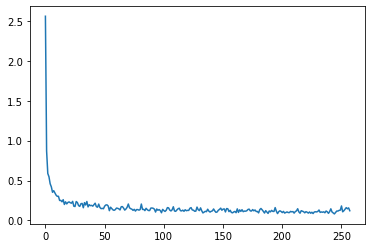

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)